In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_CISO = pd.read_csv('gdrive/My Drive/CarbonPred/Data for Paper/csvs_spci_hourly/CISO_direct_hourly_CI_forecasts_spci__alpha_0.1.csv')
df_ERCO = pd.read_csv('gdrive/My Drive/CarbonPred/Data for Paper/csvs_spci_hourly/ERCO_direct_hourly_CI_forecasts_spci__alpha_0.1.csv')
df_ISNE = pd.read_csv('gdrive/My Drive/CarbonPred/Data for Paper/csvs_spci_hourly/ISNE_direct_hourly_CI_forecasts_spci__alpha_0.1.csv')

In [52]:
def get_df_subset(df):
  df['datetime'] = pd.to_datetime(df['datetime'])
  # Adjust these for time range you want
  df = df[df['datetime'] >= '2022-07-06 00:00:00']
  df = df[df['datetime'] <= '2022-07-09 00:00:00']
  return df

In [68]:
COLORS = {"CISO": "#ffe6cc", "ERCO": "#99ccff", "ISNE": "#d9b3ff"}

def plot_df(df, region):
  plt.figure(figsize=(8, 4))

  plt.plot(df['datetime'], df['actual'], label='True Value', color='green')
  plt.plot(df['datetime'], df['predicted'], label='Predicted Value', color='red')

  # Fill the area between lower and upper bound
  plt.fill_between(df['datetime'], df['lower bound'], df['upper bound'], color=COLORS[region], alpha=0.3)

  # Set labels and title
  plt.xlabel('Date (2022)')
  plt.ylabel('Carbon Intensity')
  plt.title(f'{region} Carbon Intensity Predictions with 90% Confidence Intervals')

  # Add legend
  plt.legend()

  # Show plot
  plt.show()

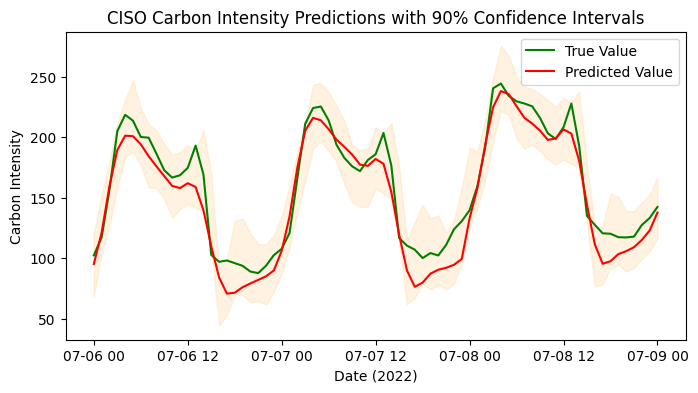

In [62]:
df_CISO = get_df_subset(df_CISO)
plot_df(df_CISO, "CISO")

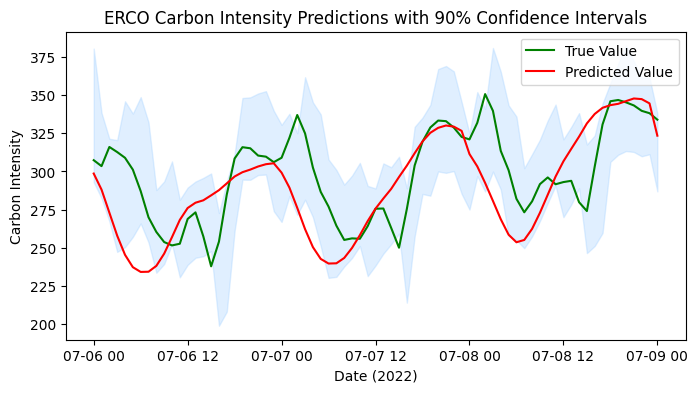

In [67]:
df_ERCO = get_df_subset(df_ERCO)
plot_df(df_ERCO, "ERCO")

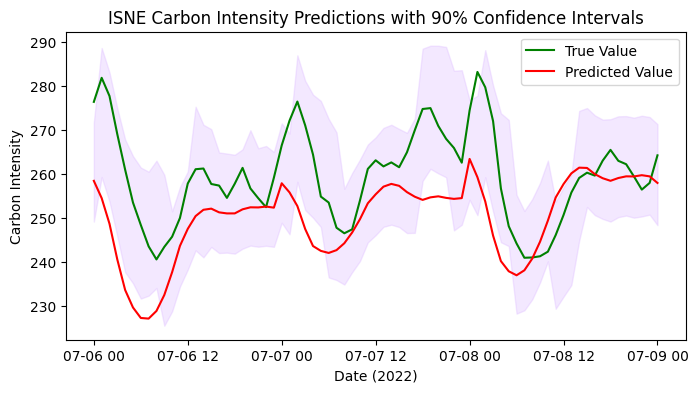

In [69]:
df_ISNE = get_df_subset(df_ISNE)
plot_df(df_ISNE, "ISNE")